# Regressione

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Paolo\AppData\Local\Temp\ipykernel_1544\1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
metriquadri=[110,100,100,180, 90, 90,110,140,110,130, 80, 78,150,160,160,120,130,100,120,107, 95,140,107,110,110,140,140]
costo=[458,403,351,666,324,453,432,625,471,687,388,453,549,579,700,444,647,461,487,428,406,516,441,671,504,778,460]

In [3]:
df = pd.DataFrame(data={"costo":costo,"metriquadri":metriquadri})

In [4]:
df.head()

costo  metriquadri
0    458          110
1    403          100
2    351          100
3    666          180
4    324           90

<Axes: xlabel='metriquadri', ylabel='costo'>

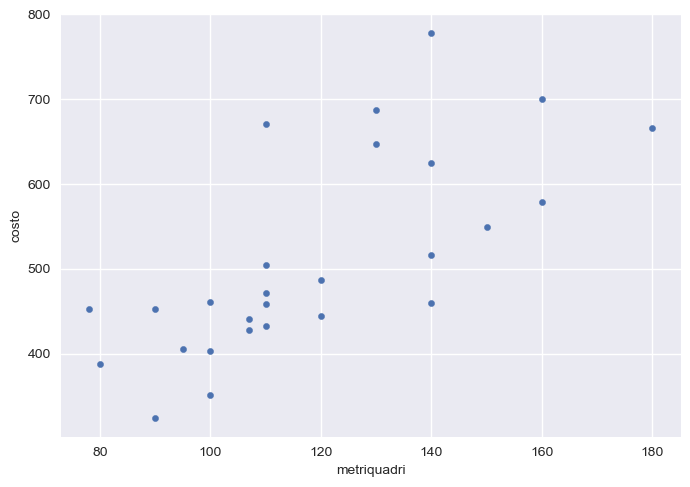

In [5]:
df.plot(kind="scatter",x="metriquadri",y="costo")

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression(fit_intercept=True)

In [8]:
lm.fit(X=df.metriquadri.to_frame(),y=df.costo.to_frame())

LinearRegression()

In [9]:
pendenza=float(lm.coef_)
pendenza

3.2621480910142697

In [10]:
intercetta=float(lm.intercept_)
intercetta

122.97374341174952

In [11]:
df["predicted"]=lm.predict(df.metriquadri.to_frame())

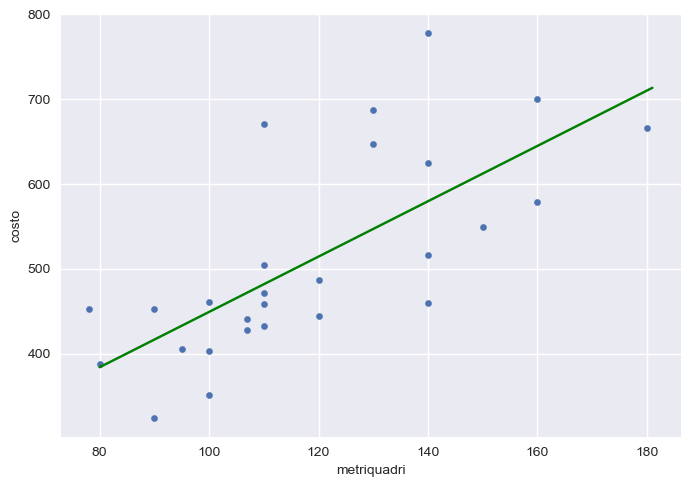

In [12]:
df.plot(kind="scatter",x="metriquadri",y="costo")
plt.plot(np.array([80,181]),intercetta+pendenza*np.array([80,181]), color="Green")

In [13]:
df_new = pd.DataFrame(data={"costo":[706,826,540,477,560],"metriquadri":[210,190,124,140,130]})

In [14]:
df_new["predicted"]=lm.predict(df_new.metriquadri.to_frame())
# NOTARE che il modello di regressione è ADDESTRATO sui dati VECCHI!!

In [15]:
df_new

costo  metriquadri   predicted
0    706          210  808.024843
1    826          190  742.781881
2    540          124  527.480107
3    477          140  579.674476
4    560          130  547.052995

<Figure size 800x550 with 0 Axes>

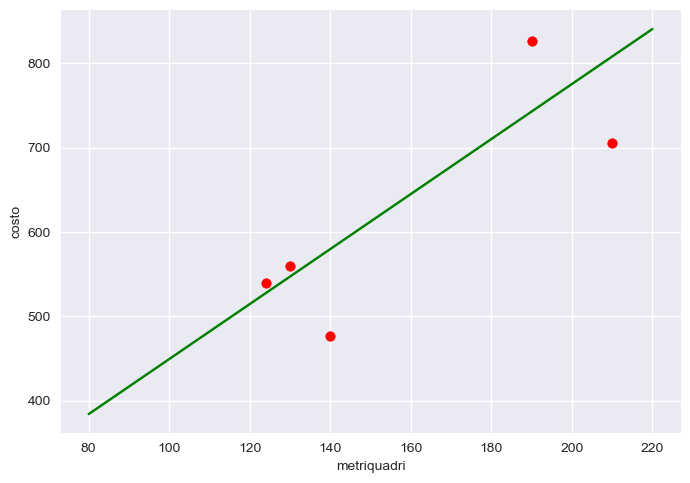

In [16]:
plt.figure()
df_new.plot(kind="scatter",x="metriquadri",y="costo")
#df_new.plot(kind="scatter",x="metriquadri",y="predicted")
plt.scatter(x=df_new.metriquadri,y=df_new.costo, color="Red")
plt.plot(np.array([80,220]),intercetta+pendenza*np.array([80,220]), color="Green")

## Regressione multilineare

$ y = a + b_1 x_1 + b_2 x_2 + ... + b_n x_n$

In [17]:
piano=[  1,  2,  0,  4,  3,  1,  5,  8,  5,  4,  5,  6,  7,  2,  0,  0,  1,  4,  2,  5,  5,  1,  2,  3,  4,  3,  5]        

In [18]:
df["piano"]=piano

In [19]:
lm.fit(X=df[["metriquadri","piano"]],y=df.costo.to_frame())

LinearRegression()

In [20]:
lm.intercept_

array([115.53136268])

In [21]:
lm.coef_

array([[3.26922999, 2.02537082]])

In [22]:
df["predicted"]=lm.predict(df[["metriquadri","piano"]])

In [23]:
df

costo  metriquadri   predicted  piano
0     458          110  477.172032      1
1     403          100  446.505103      2
2     351          100  442.454362      0
3     666          180  712.094244      4
4     324           90  415.838174      3
5     453           90  411.787433      1
6     432          110  485.273516      5
7     625          140  589.426528      8
8     471          110  485.273516      5
9     687          130  548.632745      4
10    388           80  387.196616      5
11    453           78  382.683527      6
12    549          150  620.093457      7
13    579          160  642.658903      2
14    700          160  638.608161      0
15    444          120  507.838961      0
16    647          130  542.556632      1
17    461          100  450.555845      4
18    487          120  511.889703      2
19    428          107  475.465826      5
20    406           95  436.235066      5
21    516          140  575.248932      1
22    441          107  469.389713      2
23    671          110  481.222774      3
24    504          110  483.248145      4
25    778          140  579.299674      3
26    460          140  583.350415      5

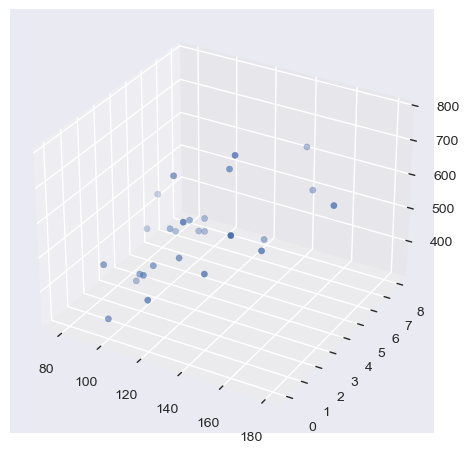

In [24]:
fig = plt.figure()
a = fig.add_subplot(projection='3d')
a.scatter(df.metriquadri, df.piano, df.costo)

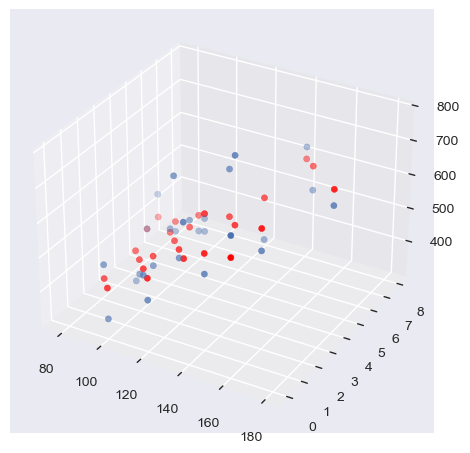

In [25]:
fig = plt.figure()
a = fig.add_subplot(projection='3d')
a.scatter(df.metriquadri, df.piano, df.costo)
a.scatter(df.metriquadri, df.piano, df.predicted, color="red")

## Regressione polinomiale (opzionale!)

$ y = a + b_1 x + b_2 x^2 + ... + b_n x^n$

In [26]:
poly = np.polyfit(x=df.metriquadri,y=df.costo,deg=2)

In [27]:
poly

array([-1.12574970e-02,  6.08446975e+00, -4.62251984e+01])

In [28]:
x_poly=list(range(80,181,1))
y_poly=np.polyval(poly,x_poly)

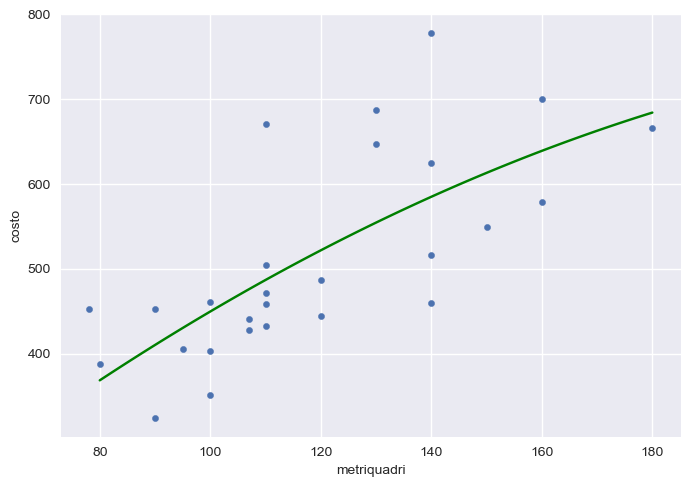

In [29]:
df.plot(kind="scatter",x="metriquadri",y="costo")
plt.plot(np.array(x_poly),y_poly, color="Green")

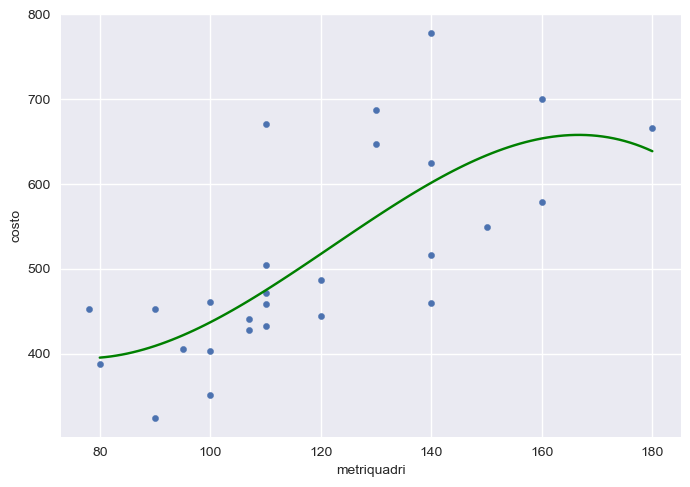

In [30]:
poly = np.polyfit(x=df.metriquadri,y=df.costo,deg=3)
x_poly=list(range(80,181,1))
y_poly=np.polyval(poly,x_poly)
df.plot(kind="scatter",x="metriquadri",y="costo")
plt.plot(np.array(x_poly),y_poly, color="Green")

## Overfitting

(250.0, 850.0)

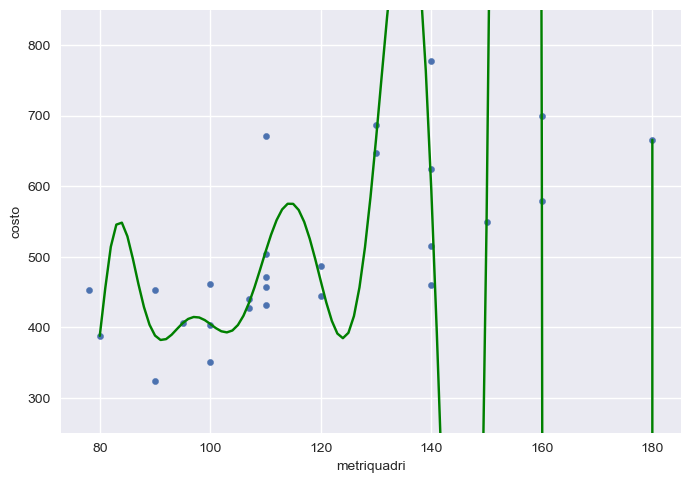

In [31]:
poly = np.polyfit(x=df.metriquadri,y=df.costo,deg=12)
x_poly=list(range(80,181,1))
y_poly=np.polyval(poly,x_poly)

df.plot(kind="scatter",x="metriquadri",y="costo")
plt.plot(np.array(x_poly),y_poly, color="Green")
plt.ylim(250,850)


## Underfitting

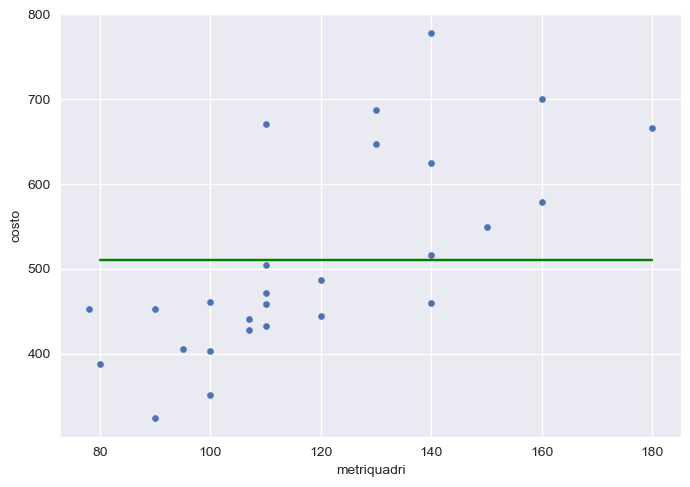

In [32]:
poly = np.polyfit(x=df.metriquadri,y=df.costo,deg=0)
x_poly=list(range(80,181,1))
y_poly=np.polyval(poly,x_poly)
df.plot(kind="scatter",x="metriquadri",y="costo")
plt.plot(np.array(x_poly),y_poly, color="Green")